# **SME0818 - Inferência Estatística - Atividade 2**
---

## **Método de Máxima Verossimilhança**


Amanda Caroline de Oliveira Pires - 12559090

**1)** Considere o conjunto de dados de tamanho n disponível no arquivo AMOSTRA k.txt (k é um número conhecido de identificação). Acredita-se que a distribuição que gerou os dados é uma Poisson Zero-Truncada com parâmetro θ > 0, cuja f.m.p. é dada por:

![image.png](attachment:image.png)

Obtenha a estivativa de máxima verossimilhança para descrever completamente o comportamento dos dados (considere  erro = 10^−5). Compare a frequência observada com a frequência esperada obtida a partir da distribuição ajustada.

## **Bibliotecas e Funções**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
import seaborn as sns
from scipy.optimize import minimize
from scipy.stats import poisson
from scipy.misc import derivative
from math import exp, factorial
from functools import reduce
from scipy.optimize import minimize_scalar
import math as m
import matplotlib.pyplot as plt

In [ ]:
# Amostra observada

dados = [8, 3, 3, 1, 4, 3, 3, 2, 2, 3, 3, 1, 1, 3, 5, 3, 3, 3, 7, 3,
        4 ,3 ,2 ,2 ,4 ,3 ,1 ,4 ,1 ,5 ,3 ,3 ,2 ,3 ,3 ,1 ,3 ,1 ,2 ,2 ,
        2 ,5 ,3 ,4 ,5 ,2 ,1 ,2 ,4 ,2 ,3 ,5 ,5 ,2 ,2 ,5 ,3 ,4 ,3 ,5]

In [ ]:
# Estimativa inicial para o parâmetro θ
# Vamos utilizar a média amostral como "chute inicial"

media_amostral = st.mean(dados)

theta_inicial = 3.05

In [ ]:
n = len(dados)
sum = media_amostral*n

def derivada1(theta):
  return (-n + ((-n * math.exp(-theta))/(1 - math.exp(-theta))) + (1/theta) * sum)

def derivada2(theta):
  return ((((n *(1 - math.exp(-theta))*(math.exp(-theta))) + n * (math.exp(-2*theta)))/((1 - math.exp(-theta))**2)) - (sum/(theta**2)))

# Otimização para encontrar a Estimativa de Máxima Verossimilhança de θ
# pelo método de Newton Raphson

def Newton_Raphson(derivada1, derivada2, theta_inicial, erro = 1e-5):
  if abs(derivada1(theta_inicial)) <= erro:
    return theta_inicial

  else:
    while abs(derivada1(theta_inicial)) > erro:
      theta1 = theta_inicial - derivada1(theta_inicial)/derivada2(theta_inicial)

      if abs(derivada1(theta1)) <= erro:
        return theta1
      else:
        theta_inicial = theta1

  print(theta1)

Newton_Raphson(derivada1, derivada2, theta_inicial)

2.8785385788814235

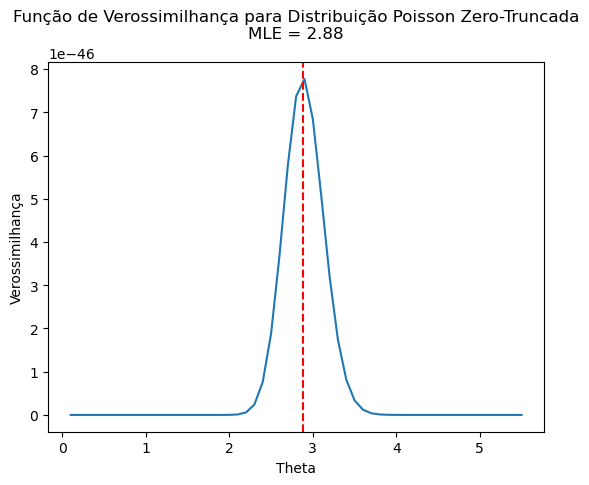

In [ ]:
def poisson_zero_truncated(theta, x):
    return (exp(-theta) * theta**x) / (factorial(x) * (1 - exp(-theta)))

def likelihood(theta, data):
    likelihoods = [poisson_zero_truncated(theta, x) for x in data]
    return reduce(lambda x, y: x*y, likelihoods)

def neg_likelihood(theta, data):
    return -likelihood(theta,data)

res = minimize_scalar(neg_likelihood, args=(data,), bounds=(0.01,20), method='bounded')
mle = res.x

thetas = [i/10 for i in range(1,int(mle*10)*2)]
likelihoods = [likelihood(theta,data) for theta in thetas]

plt.plot(thetas, likelihoods)
plt.axvline(x=mle,color='r',linestyle='--')
plt.xlabel('Theta')
plt.ylabel('Verossimilhança')
plt.title(f'Função de Verossimilhança para Distribuição Poisson Zero-Truncada\nMLE = {mle:.2f}')
plt.show()

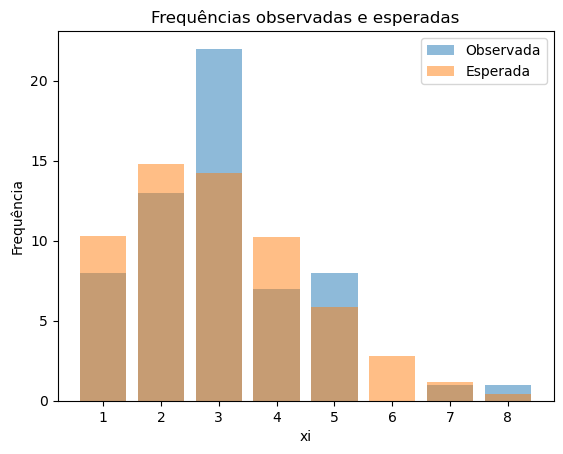

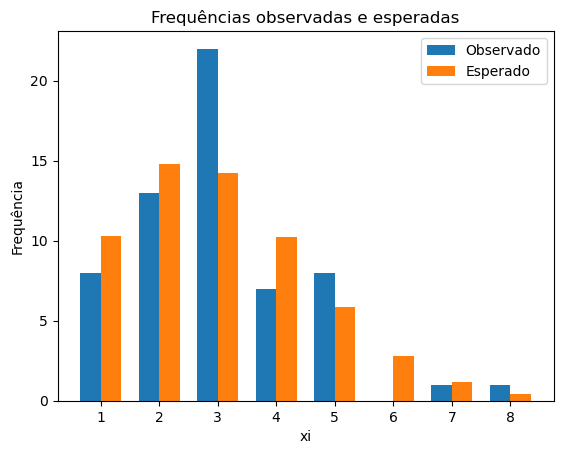

In [ ]:
# Frequência observada
frequencia_observada = np.bincount(dados)[1:]

# Frequência esperada
frequencia_esperada = poisson.pmf(range(1,len(frequencia_observada)+1),
                                   mle)/(1-np.exp(-mle))*len(dados)

# Plot das frequências observadas e esperadas

x = range(1,len(frequencia_observada)+1)
plt.bar(x,frequencia_observada,alpha=0.5,label='Observada')
plt.bar(x,frequencia_esperada,alpha=0.5,label='Esperada')
plt.xlabel('xi')
plt.ylabel('Frequência')
plt.title('Frequências observadas e esperadas')
plt.legend()
plt.show()


# Frequência observada
frequencia_observada = np.bincount(dados)[1:]

# Frequência esperada
frequencia_esperada = poisson.pmf(range(1,len(frequencia_observada)+1), mle)/(1-np.exp(-mle))*len(dados)

# Definindo a largura das barras
largura = 0.35

# Definindo a posição das barras no eixo x
posicao_barras = np.arange(len(frequencia_observada))

# Plotando as barras
fig, ax = plt.subplots()
plt.xlabel('xi')
barras_observadas = ax.bar(posicao_barras - largura/2, frequencia_observada,
                            largura,label='Observado')
barras_esperadas = ax.bar(posicao_barras + largura/2,frequencia_esperada,
                            largura,label='Esperado')

# Adicionando legendas e títulos
ax.set_ylabel('Frequência')
ax.set_title('Frequências observadas e esperadas')
ax.set_xticks(posicao_barras)
ax.set_xticklabels([str(i) for i in range(1,len(frequencia_observada)+1)])
ax.legend()

plt.show()

Frequência observada: [8, 13, 22, 7, 8, 2]
Frequência esperada: [10.287686048984671, 14.806750034383144, 14.207266534430769, 10.224040821499152, 5.886058966591734, 4.40293935398684]


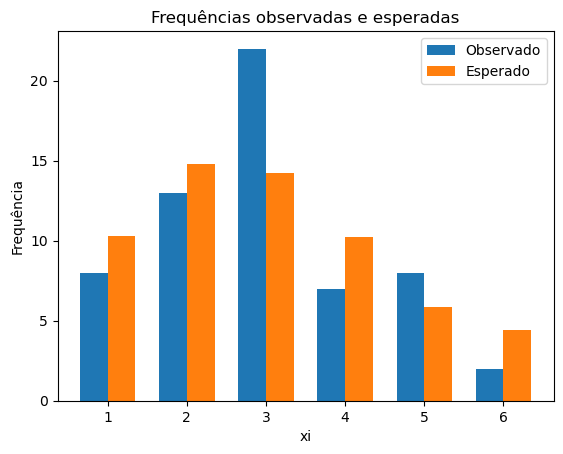

In [ ]:
# Cálculo da frequência esperada, acumulada para xi >= 6

frequencia_esperada = list(frequencia_esperada)

freq_esperada_ajust = []
for i in frequencia_esperada:
  if i < 5:
    freq_esperada_ajust.append(i)
  sum = np.sum(freq_esperada_ajust)

freq_esperada_ajust
frequencia_esperada.append(sum)

for i in freq_esperada_ajust:
  frequencia_esperada.remove(i)

# Cálculo da frequência observada, acumulada para xi >= 6

frequencia_observada = list(frequencia_observada)

freq_obs_ajust = []
for i in frequencia_observada:
  if i < 5:
    freq_obs_ajust.append(i)
  sum = np.sum(freq_obs_ajust)

freq_obs_ajust
frequencia_observada.append(sum)

for i in freq_obs_ajust:
  frequencia_observada.remove(i)

print(f"Frequência observada: {frequencia_observada}")
print(f"Frequência esperada: {frequencia_esperada}")

# Definindo a largura das barras
largura = 0.35

# Definindo a posição das barras no eixo x
posicao_barras = np.arange(len(frequencia_observada))

# Plotando as barras
fig, ax = plt.subplots()
plt.xlabel('xi')
barras_observadas = ax.bar(posicao_barras - largura/2, frequencia_observada,
                            largura,label='Observado')
barras_esperadas = ax.bar(posicao_barras + largura/2,frequencia_esperada,
                            largura,label='Esperado')

# Adicionando legendas e títulos
ax.set_ylabel('Frequência')
ax.set_title('Frequências observadas e esperadas')
ax.set_xticks(posicao_barras)
ax.set_xticklabels([str(i) for i in range(1,len(frequencia_observada)+1)])
ax.legend()

plt.show()